In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Matplotlib is building the font cache; this may take a moment.


In [3]:
demand = pd.read_csv('datasets/demand_forecasting.csv')
demand

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,None,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular
...,...,...,...,...,...,...,...,...,...,...
9995,6545,2024-11-26,54,47,47.12,No,None,Competitor Pricing,Decreasing,Budget
9996,4341,2024-04-08,82,59,65.11,No,Festival,None,Increasing,Budget
9997,8679,2024-02-16,55,481,59.97,No,Holiday,Economic Indicator,Stable,Premium
9998,6281,2024-02-15,97,142,48.70,No,Festival,None,Decreasing,Regular


In [4]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  10000 non-null  object 
 7   External Factors     10000 non-null  object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [6]:
demand.describe()

,Product ID,Store ID,Sales Quantity,Price
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5533.521700,50.264900,248.728900,52.447878
std,2568.312468,28.656333,143.767452,27.459355
min,1000.000000,1.000000,1.000000,5.000000
25%,3319.000000,26.000000,125.000000,28.480000
50%,5579.000000,50.000000,249.000000,52.330000
75%,7696.500000,75.000000,373.000000,76.252500
max,9998.000000,99.000000,499.000000,99.990000


In [9]:
demand.isnull().sum()

Product ID             0
Date                   0
Store ID               0
Sales Quantity         0
Price                  0
Promotions             0
Seasonality Factors    0
External Factors       0
Demand Trend           0
Customer Segments      0
dtype: int64

In [8]:
demand['Date'] = pd.to_datetime(demand['Date'])

In [10]:
demand['Month'] = demand['Date'].dt.month
demand['DayOfWeek'] = demand['Date'].dt.dayofweek
demand['Year'] = demand['Date'].dt.year

In [11]:
demand['Product ID'] = demand['Product ID'].astype('category').cat.codes
demand['Store ID'] = demand['Store ID'].astype('category').cat.codes
demand['Customer Segments'] = demand['Customer Segments'].astype('category').cat.codes

C:\Users\SANIA\AppData\Local\Temp\ipykernel_14228\3879631810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(demand.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Feature Correlation')

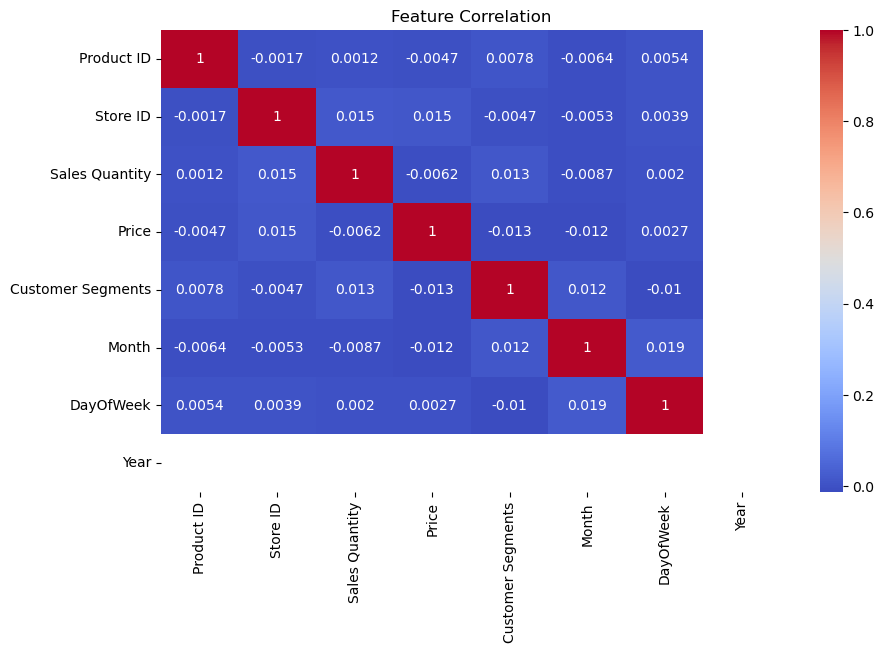

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(demand.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")


In [16]:
features = [
    'Product ID', 'Store ID', 'Price', 'Promotions',
    'Seasonality Factors', 'External Factors', 'Demand Trend',
    'Customer Segments', 'Month', 'DayOfWeek', 'Year'
]

X = demand[features]
y = demand['Sales Quantity']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'No'

In [19]:
demand[features].dtypes


Product ID               int16
Store ID                  int8
Price                  float64
Promotions              object
Seasonality Factors     object
External Factors        object
Demand Trend            object
Customer Segments         int8
Month                    int64
DayOfWeek                int64
Year                     int64
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in features:
    if demand[col].dtype == 'object':
        demand[col] = le.fit_transform(demand[col])

In [22]:
X = demand[features]
y = demand['Sales Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [23]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: -0.0019163126827950183
RMSE: 145.22147385513287


In [24]:
sample_input = pd.DataFrame({
    'Product ID': [10],
    'Store ID': [3],
    'Price': [250],
    'Promotions': [1],
    'Seasonality Factors': [0.8],
    'External Factors': [1.2],
    'Demand Trend': [0.9],
    'Customer Segments': [2],
    'Month': [5],
    'DayOfWeek': [0],
    'Year': [2025]
})

prediction = model.predict(sample_input)
print(f"Predicted Demand: {prediction[0]:.2f} units")

Predicted Demand: 237.48 units


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 21089.28
Mean Absolute Error: 125.65
R² Score: -0.00


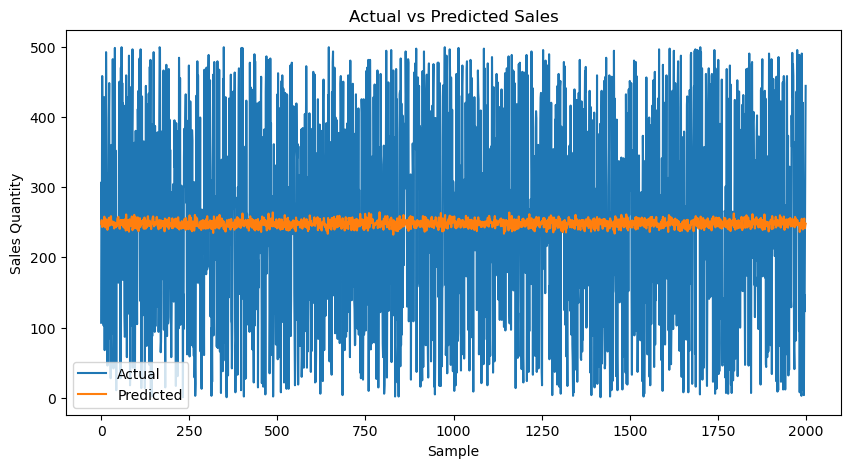

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual')
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Sales Quantity")
plt.legend()
plt.show()

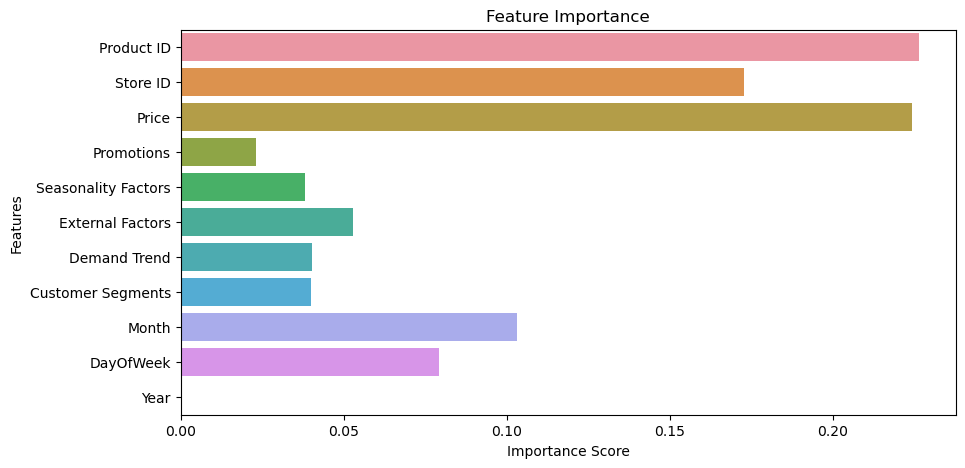

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Plot feature importances
importances = rf_model.feature_importances_
features_list = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features_list)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


13:11:41 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing


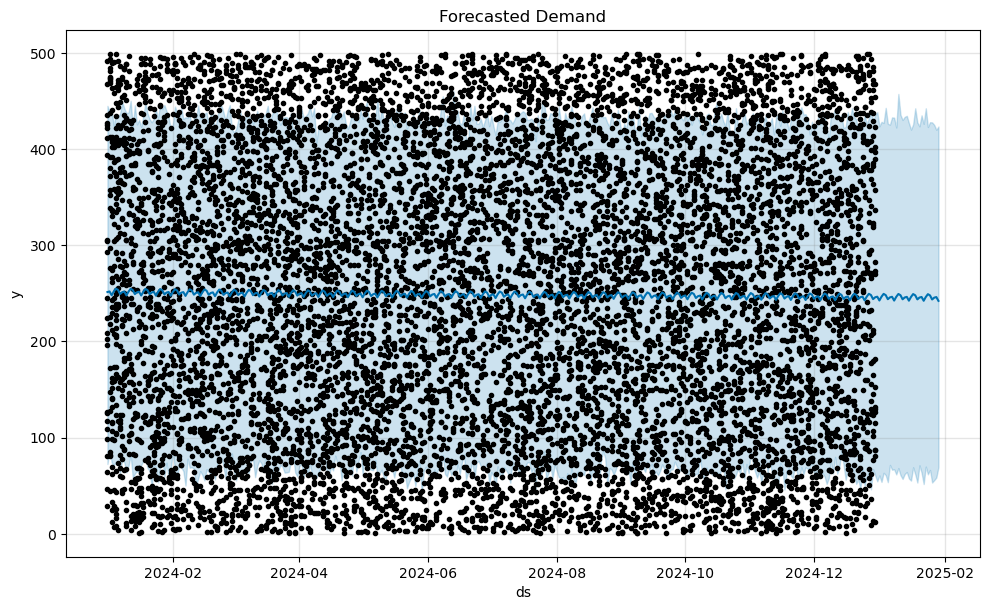

In [31]:
from prophet import Prophet

# Prepare data
demand_prophet = demand[['Date', 'Sales Quantity']].rename(columns={'Date': 'ds', 'Sales Quantity': 'y'})

# Create model
model = Prophet()
model.fit(demand_prophet)

# Create future dataframe (next 30 days or weeks)
future = model.make_future_dataframe(periods=30)  # change periods as needed
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Forecasted Demand")
plt.show()


In [29]:
!pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/3c/1c/9e3fc8b8d4f2361b423e726732fcbb81f8817c7399a94d25296fc668586a/holidays-0.69-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [30]:
from prophet import Prophet

In [32]:
import joblib
joblib.dump(model, 'demand_forecasting_model.pkl')

['demand_forecasting_model.pkl']

In [33]:
model = joblib.load('demand_forecasting_model.pkl')